In [ ]:
import pandas as pd
df = pd.read_csv("Sample - Superstore.csv", engine='python', on_bad_lines='warn', encoding='latin1')

df = df[['Order ID', 'Order Date', 'Ship Date','Customer ID', 'Customer Name', 'Segment', 'Country', 'City','Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity','Profit']]

In [ ]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name',
       'Segment', 'Country', 'City', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Profit'],
      dtype='object')

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [ ]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month Name'] = df['Order Date'].dt.month_name()

In [ ]:
yearly = df.groupby(['Year'])[['Sales','Profit']].sum().reset_index()
yearly

,Year,Sales,Profit
0,2014,484247.4981,49543.9741
1,2015,470532.5090,61618.6037
2,2016,609205.5980,81795.1743
3,2017,733215.2552,93439.2696


In [ ]:
category_perf =(
    df.groupby(['Category'])[['Sales','Profit']]
    .sum()
    .sort_values(by='Sales', ascending=False).reset_index()
)
category_perf

,Category,Sales,Profit
0,Technology,836154.0330,145454.9481
1,Furniture,741999.7953,18451.2728
2,Office Supplies,719047.0320,122490.8008


In [ ]:
segment_type = df.groupby(['Segment'])[['Sales','Profit']].sum().sort_values(by='Profit', ascending=False).reset_index()
segment_type

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


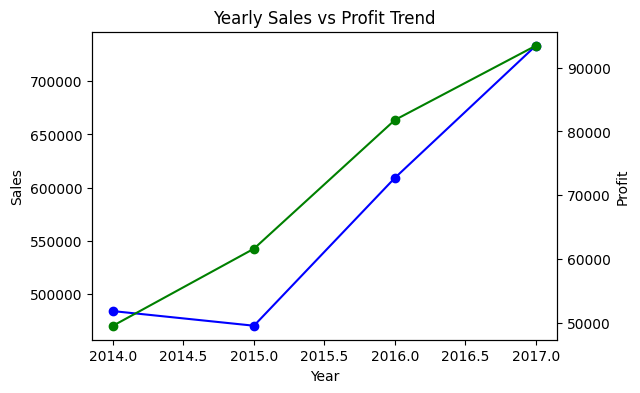

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.plot(yearly['Year'], yearly['Sales'], marker='o',color='blue')
ax1.set_xlabel("Year")
ax1.set_ylabel("Sales")

ax2 = ax1.twinx()
ax2.plot(yearly['Year'], yearly['Profit'], marker='o',color='green')
ax2.set_ylabel("Profit")

plt.title("Yearly Sales vs Profit Trend")
plt.show()


• Sales declined slightly in 2015 but grew strongly afterward.

• Profit shows a consistent upward trend across all years.

• The business has improved profitability even when sales growth was moderate.


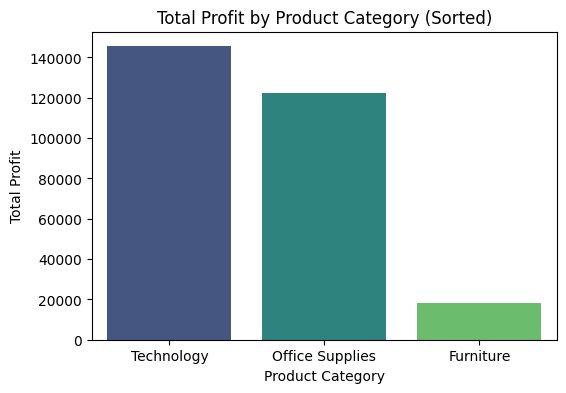

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

category_perf_sorted = category_perf.sort_values(by='Profit', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x='Category', y='Profit', data=category_perf_sorted, palette='viridis', hue='Category', legend=False)

plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.title('Total Profit by Product Category (Sorted)')
plt.show()

• Technology is the most profitable category.

• Furniture generates significantly lower profit compared to its sales.

• Office Supplies shows stable but moderate profitability.


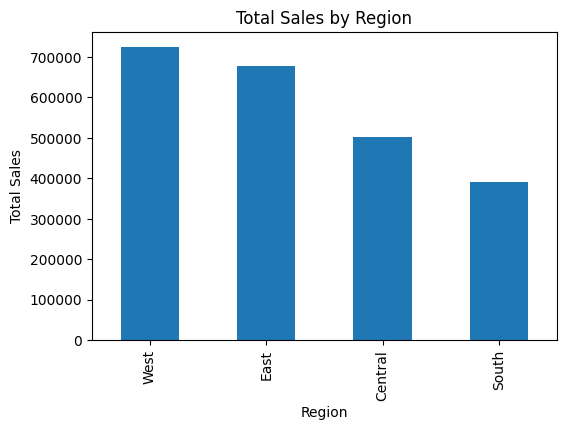

In [ ]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
region_sales.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')
plt.show()

Overall Business Summary:

• Technology category and Consumer segment are key profit drivers.

• High discounts significantly reduce profitability.

• West region performs best in terms of sales.

• Business should limit high discounts and focus on profitable categories.


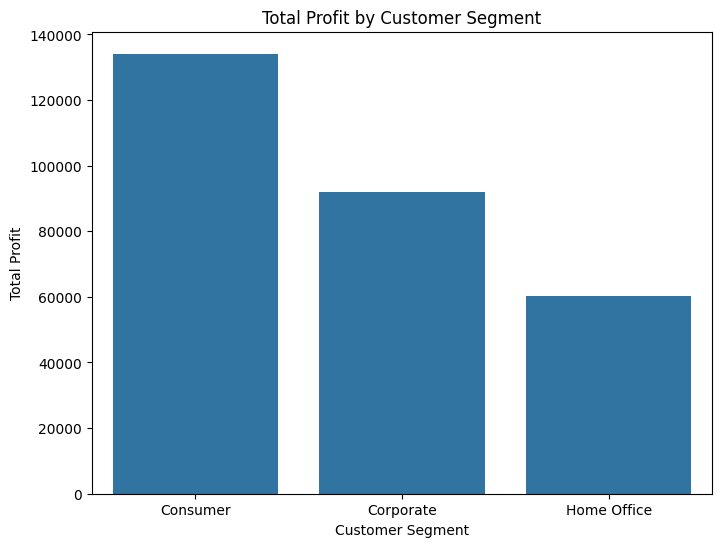

In [ ]:
segment_type_sorted = segment_type.sort_values(by='Profit', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Segment', y='Profit', data=segment_type_sorted)
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit')
plt.title('Total Profit by Customer Segment')
plt.show()

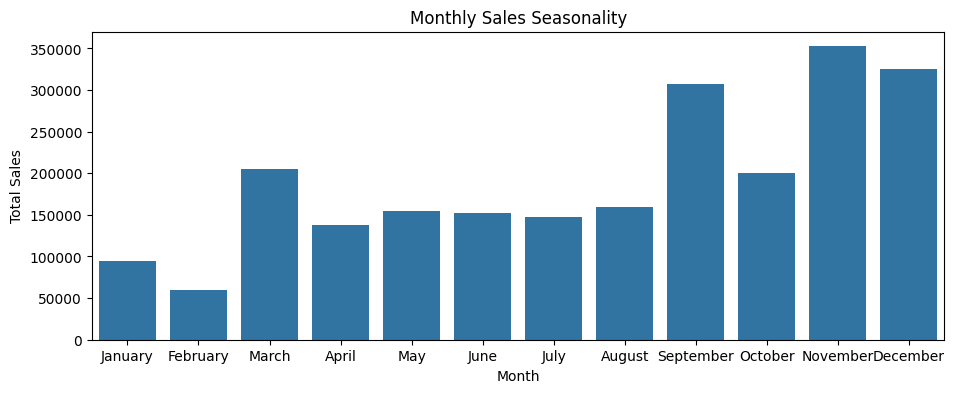

In [ ]:
monthly_seasonality = df.groupby('Month Name')['Sales'].sum().reindex(['January','February','March','April','May','June',
          'July','August','September','October','November','December']).reset_index()
plt.figure(figsize=(11,4))
sns.barplot(x='Month Name', y='Sales', data=monthly_seasonality)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Seasonality')
plt.show()